<a href="https://colab.research.google.com/github/danieel99/first_repo/blob/master/songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
songs = pd.read_csv('fma-rock-vs-hiphop.csv')
print(songs.head())

   track_id  bit_rate  comments  ... publisher tags                       title
0       135    256000         1  ...       NaN   []                Father's Day
1       136    256000         1  ...       NaN   []  Peel Back The Mountain Sky
2       151    192000         0  ...       NaN   []                 Untitled 04
3       152    192000         0  ...       NaN   []                 Untitled 11
4       153    256000         0  ...       NaN   []          Hundred-Year Flood

[5 rows x 21 columns]


In [4]:
echo_metrics = pd.read_json('echonest-metrics.json', precise_float = True)
print(echo_metrics.head())

   track_id  acousticness  danceability  ...  speechiness    tempo   valence
0         2      0.416675      0.675894  ...     0.159310  165.922  0.576661
1         3      0.374408      0.528643  ...     0.461818  126.957  0.269240
2         5      0.043567      0.745566  ...     0.124595  100.260  0.621661
3        10      0.951670      0.658179  ...     0.032985  111.562  0.963590
4       134      0.452217      0.513238  ...     0.525519  114.290  0.894072

[5 rows x 9 columns]


In [5]:
# merge the revelant columns of songs and echo_metrics
echo_songs = pd.merge(echo_metrics, songs[['track_id','genre_top']], on = 'track_id')
print(echo_songs.head())

   track_id  acousticness  danceability  ...    tempo   valence  genre_top
0         2      0.416675      0.675894  ...  165.922  0.576661    Hip-Hop
1         3      0.374408      0.528643  ...  126.957  0.269240    Hip-Hop
2         5      0.043567      0.745566  ...  100.260  0.621661    Hip-Hop
3       134      0.452217      0.513238  ...  114.290  0.894072    Hip-Hop
4       153      0.988306      0.255661  ...   90.241  0.034018       Rock

[5 rows x 10 columns]


In [ ]:
echo_songs.info()

In [7]:
# create a correlation matrix
corr_metrics = echo_songs.corr()
corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [8]:
features = echo_songs.drop(['genre_top', 'track_id'], axis = 1)
# print(features)
labels = echo_songs['genre_top']
# print(labels)

In [9]:
from sklearn.preprocessing import StandardScaler

In [11]:
# scale the features and set values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Text(0.5, 0, 'Principal Component #')

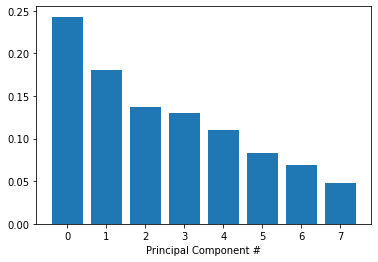

In [13]:
# get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_
# print(exp_variance)

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(len(exp_variance)), exp_variance)
ax.set_xlabel('Principal Component #')



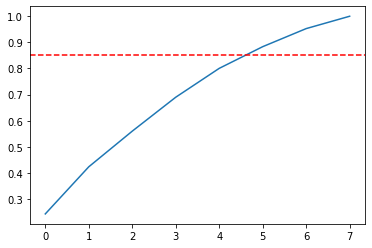

In [14]:
cum_exp_variance =  np.cumsum(exp_variance)
# print(cum_exp_variance)
fig, ax = plt.subplots()
ax.plot(range(len(cum_exp_variance)), cum_exp_variance)
ax.axhline(y = .85, linestyle = '--', color = 'r')

In [15]:
n_components = 6

pca = PCA(n_components, random_state = 10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [17]:
train_features, test_features = train_test_split(pca_projection, random_state = 10)
train_labels, test_labels = train_test_split(labels, random_state = 10)

tree = DecisionTreeClassifier(random_state = 10)
tree.fit(train_features, train_labels)

pred_labels_tree = tree.predict(test_features)
# print(pred_labels_tree)


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logreg = LogisticRegression(random_state = 10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)
# print(pred_labels_logit)


In [20]:
from sklearn.metrics import classification_report

In [22]:
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)
print('-------------------------Decision Tree--------------------------')
print(class_rep_tree)
print('-------------------------Logistic Regression--------------------')
print(class_rep_log)

-------------------------Decision Tree--------------------------
              precision    recall  f1-score   support

     Hip-Hop       0.60      0.60      0.60       235
        Rock       0.90      0.90      0.90       966

    accuracy                           0.84      1201
   macro avg       0.75      0.75      0.75      1201
weighted avg       0.84      0.84      0.84      1201

-------------------------Logistic Regression--------------------
              precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



In [31]:
hop_only = echo_songs.loc[echo_songs['genre_top'] == 'Hip-Hop']
rock_only = echo_songs.loc[echo_songs['genre_top'] == 'Rock']

rock_only = rock_only.sample(len(hop_only), random_state = 10)

rock_hop_bal = pd.concat([rock_only, hop_only])

features = rock_hop_bal.drop(['genre_top', 'track_id'], axis = 1) 
labels = rock_hop_bal['genre_top']
pca_projection = pca.fit_transform(scaler.fit_transform(features))

train_features, test_features = train_test_split(pca_projection, random_state = 10)
train_labels, test_labels = train_test_split(labels, random_state = 10)

In [ ]:
tree = DecisionTreeClassifier(random_state = 10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)
# print(pred_labels_tree)

In [ ]:
logreg = LogisticRegression(random_state = 10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)
# print(pred_labels_logit)

In [38]:
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)
print('-------------------------Decision Tree--------------------------')
print(class_rep_tree)
print('-------------------------Logistic Regression--------------------')
print(class_rep_log)

-------------------------Decision Tree--------------------------
              precision    recall  f1-score   support

     Hip-Hop       0.74      0.73      0.74       230
        Rock       0.73      0.74      0.73       225

    accuracy                           0.74       455
   macro avg       0.74      0.74      0.74       455
weighted avg       0.74      0.74      0.74       455

-------------------------Logistic Regression--------------------
              precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.80      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455



In [39]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
kf = KFold(n_splits = 10, random_state = 10)

tree = DecisionTreeClassifier(random_state = 10)
logreg = LogisticRegression(random_state = 10)

tree_score = cross_val_score(tree, pca_projection, labels, cv = kf)
logit_score = cross_val_score(logreg, pca_projection, labels, cv = kf)



In [45]:
print("Decision Tree: ", np.mean(tree_score), "\nLogistic Regression:", np.mean(logit_score))

Decision Tree:  0.7489010989010989 
Logistic Regression: 0.782967032967033
